<a href="https://colab.research.google.com/github/ErikFantomex/Segmentacion_Angiogramas/blob/main/FiltroGaussiano/GMF_vessels_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funcion gaussiana


To form the Gaussian template, four different parameters have to be tuned. 

The main parameter is the continuous 

σ: value that represents the spread of the intensity profile 

The remaining three parameters are defined in the discrete domain.

L : the length of the vessel segment to be processed, 

T : the position where the Gaussian curve trails will cut, 

κ : represents the number of orientations in the directional filter bank.


In [ ]:
#python -m pip uninstall -y scipy 
#!python -m pip install scikit-image
#!python -m pip install --user packa


#!python -m pip install scipy 

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
from scipy.signal import convolve2d
#from skimage import transform
from skimage.transform import rotate
from skimage.io import imread
#from scipy.misc import imrotate
from skimage.transform import radon, rescale
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt 
import numpy.matlib

In [ ]:
#img = '/LUSTRE/home/hgonzalez/Datasets/AngioDB/normal/_-114.png'
#img = '/LUSTRE/home/hgonzalez/Datasets/Database_134_Angiograms/77.pgm'

    #img = im2double(rgb2gray('/LUSTRE/home/hgonzalez/Datasets/AngioDB/normal/_-114.png'));


# Version python 

In [ ]:
# El chilo:
def GMF(Y, sigma, L, T, K):
    M,N = np.shape(Y)
    x = np.arange(-math.floor(T/2),math.floor(T/2)+1)
    tmp1 = np.exp(-(x*x)/(2*sigma*sigma))
    tmp1 = max(tmp1)-tmp1
    ht1 = np.matlib.repmat(tmp1,L,1)
    sht1 = np.sum(ht1)
    mean = sht1/(T*L)
    ht1 = ht1 - mean
    ht1 = ht1/sht1

    h = []
    h.append(np.zeros((L+6, T+3)))
    h[0][3:L+3,1:T+1] = ht1
    for k in range(1,K):
        ag = (180/K)*k
        h.append(rotate(h[0],angle=ag,order=3, resize=False))

    R = [convolve2d(Y, hi, mode='same') for hi in h]

    rt = np.zeros((M,N))
    ER = np.zeros(K)

    for i in range(M):
        for j in range(N):
            for f in range(K):
                ER[f] = R[f][i,j]
            rt[i,j] = max(ER)

    rmin = np.abs(np.min(rt))
    rt = rt + rmin

    rmax = np.max(rt)
    rt = np.round(rt*255.0/rmax)

    return rt

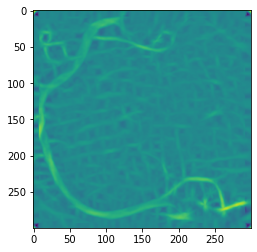

In [ ]:
Y = cv2.imread(img,0)
sigma = 1.8
L= 16
T= 17
K = 12

rt = GMF(Y, sigma, L, T, K)
plt.imshow(rt)



# Umbralizacion

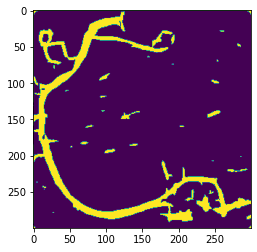

In [ ]:

#from skimage import data
#from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize


fig = threshold_otsu(rt)
binary = rt > fig
plt.imshow(binary)
#plt.show()

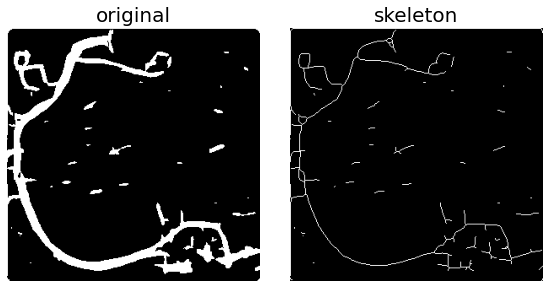

In [ ]:
skeleton = skeletonize(binary)
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

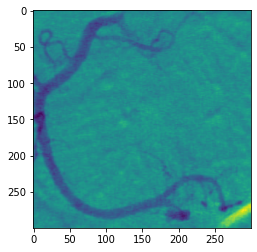

In [ ]:
plt.imshow(Y)

# Ahora para todas las imagenes 

    sigma = 1.8
    L= 16
    T= 17
    K = 12

In [ ]:
# Importamos las imagenes que estan en la carpeta y terminan en png
import os

listaImagenes = [os.path.join(root, f) for root, _, files in os.walk('/LUSTRE/home/hgonzalez/Datasets/AngioDB1/normal')
                       for f in files
                       if f.endswith('.png') and !f.endswith('.png')]

#listaImagenes = [os.path.join(root, f) for root, _, files in os.walk('/home/hgonzalez/Datasets/Database_134_Angiograms/')
 #                      for f in files
  #                     if f.endswith('.pgm') and f.endswith('.pgm')]



SyntaxError: invalid syntax (4127776220.py, line 6)

In [ ]:
#listaImagenes
# Vamos a definir una nueva funcion para enseñar imagenes
def imshow(title="Image",image = None,size=10):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.ctvColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
contador = 0
for i in listaImagenes:
    contador = contador + 1
    imagen1 = imread(i)
    imshow(str(contador),imagen1)

AttributeError: module 'cv2.cv2' has no attribute 'ctvColor'

<Figure size 720x720 with 0 Axes>